In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/38.6 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.6/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.6 MB 7.5 MB/s eta 0:00:05
   - -------------------------------------- 1.7/38.6 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.6 MB 9.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.6 MB 9.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.6 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.6 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.6 MB 10.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.6 MB 10.3 MB/s eta 0:00:04
   ----- ---------------------------------- 5.6/38.6 MB 10.5 MB/s eta 0:00:04
  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.applications.vgg16 import preprocess_input

In [6]:
train_dir = 'DATASET/TRAIN' #directory with training images
test_dir = 'DATASET/TEST' #directory with testing images

In [8]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [9]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [11]:
model = tf.keras.models.Sequential()

# Add the layers to the model
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [13]:
# Assuming you have already defined and compiled your model
optimizer = Adam(learning_rate=0.001)  # Define Adam optimizer with specific learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Specify training hyperparameters
epochs = 50  
batch_size = 16

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │     205,521,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,897,861 (785.44 MB)

 Trainable params: 205,897,861 (785.44 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

C:\Users\sarva\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50


C:\Users\sarva\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2215 - loss: 10.1930 - val_accuracy: 0.2717 - val_loss: 1.5953
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.2275 - loss: 1.6138 - val_accuracy: 0.2500 - val_loss: 1.5974
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2465 - loss: 1.5958 - val_accuracy: 0.2500 - val_loss: 1.5949
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.2600 - loss: 1.5906 - val_accuracy: 0.2500 - val_loss: 1.5920
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.2381 - loss: 1.5882 - val_accuracy: 0.2500 - val_loss: 1.5850
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.2576 - loss: 1.5863 - val_accuracy: 0.4565 - val_loss: 1.3206
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.3355 - loss: 1.5321 - val_accuracy: 0.4239 - val_loss: 1.3005
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.3541 - loss: 1.4545 - val_accuracy: 0.4239 - val_loss: 1

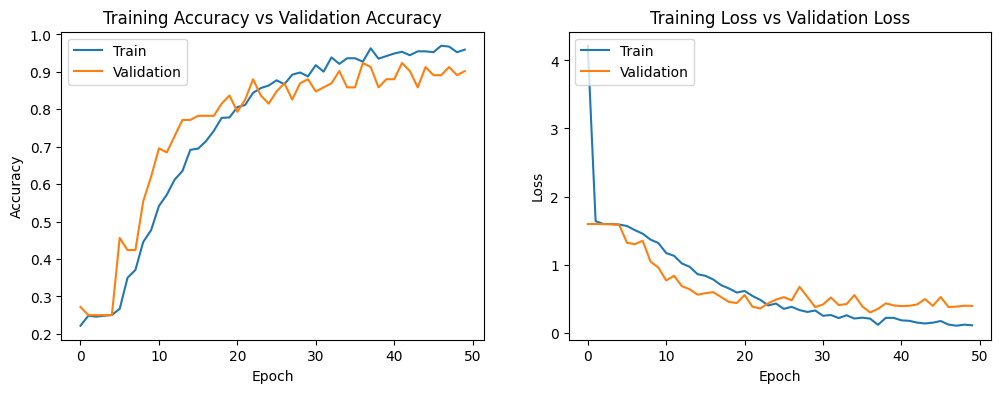

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 566ms/step - accuracy: 0.9907 - loss: 0.0312
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8808 - loss: 0.5625
final train accuracy = 98.85 , validation accuracy = 90.22


In [20]:
model.save('FitTip_1.keras')

In [24]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('FitTip_1.keras')
img = image.load_img('DATASET/TEST/downdog/00000108.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[[1. 0. 0. 0. 0.]]


In [2]:
from keras.models import load_model
model = load_model('FitTip_1.keras')

C:\Users\sarva\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [3]:
class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

# Open a video capture object (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # Read a frame from the video capture

    if not ret:
        break

    # Resize frame to match model input size (224x224)
    resized_frame = cv2.resize(frame, (224, 224))
    
    # Preprocess the frame for the model
    x = image.img_to_array(resized_frame)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)

    # Predict classes using the model
    classes = model.predict(img_data)

    # Get the predicted class label
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the predicted class label on the frame
    cv2.putText(frame, predicted_class_label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with the predicted label
    cv2.imshow('Yoga Pose Classifier', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 